<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/multivariate-linear-regression/2D_function_expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using linear regression to fit a 2-dimensional function

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random

Consider a 2-dimensional function $\cos(x^2+y^2)$ in the domain $(x,y)\in [-1,1]^2$. In the following sections, we are going to fit it with polynomials of $x$ and $y$.

In [289]:
def test_func(x, y):
    return np.cos(x**2+y**2)

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


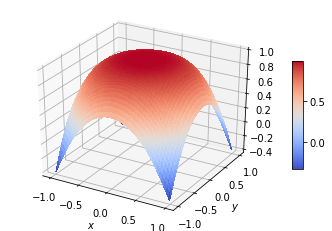

In [290]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)

X, Y = np.meshgrid(X, Y)
Z = test_func(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
cset = ax.contour(X, Y, Z, zdir='z', offset=-4, cmap=cm.coolwarm)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

First, we randomly sample some data points from the graph, and save them for future fitting.

In [291]:
random.seed
with open('test_func_data.csv', mode='w') as sample_file:
    gravity_writer = csv.writer(sample_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    gravity_writer.writerow(['f(x,y)','x', 'y'])
    for i in range (0, 200):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        gravity_writer.writerow([test_func(x, y), x, y])

In [292]:
df = pd.read_csv('/content/test_func_data.csv')
print(df)

       f(x,y)         x         y
0    0.656303  0.924592  0.004187
1    0.979727 -0.104030 -0.436900
2    0.740500  0.724694  0.460218
3    0.999979  0.041302  0.069519
4    0.998923 -0.214654 -0.018455
..        ...       ...       ...
195  0.935713 -0.127280  0.586788
196  0.864487  0.279445 -0.669760
197  0.424728  0.930187 -0.516611
198  0.891688 -0.154644  0.667699
199  0.958142  0.257162 -0.473521

[200 rows x 3 columns]


First we try the ansatz $f(x,y)=c_{0,0}+c_{1,0}x+c_{0,1}y+c_{2,0}x^2+c_{0,2}y^2+c_{3,0}x^3+c_{0,3}y^3$.

In [293]:
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x^3']=df['x']**3
df['y^3']=df['y']**3
print(df)

       f(x,y)         x         y       x^2       y^2       x^3           y^3
0    0.656303  0.924592  0.004187  0.854870  0.000018  0.790406  7.337805e-08
1    0.979727 -0.104030 -0.436900  0.010822  0.190882 -0.001126 -8.339638e-02
2    0.740500  0.724694  0.460218  0.525182  0.211800  0.380596  9.747416e-02
3    0.999979  0.041302  0.069519  0.001706  0.004833  0.000070  3.359724e-04
4    0.998923 -0.214654 -0.018455  0.046076  0.000341 -0.009890 -6.285275e-06
..        ...       ...       ...       ...       ...       ...           ...
195  0.935713 -0.127280  0.586788  0.016200  0.344321 -0.002062  2.020434e-01
196  0.864487  0.279445 -0.669760  0.078090  0.448578  0.021822 -3.004398e-01
197  0.424728  0.930187 -0.516611  0.865248  0.266887  0.804842 -1.378769e-01
198  0.891688 -0.154644  0.667699  0.023915  0.445822 -0.003698  2.976745e-01
199  0.958142  0.257162 -0.473521  0.066132  0.224222  0.017007 -1.061740e-01

[200 rows x 7 columns]


In [294]:
df = df.to_numpy()
x = df[:,1:7]
y = [df[:,0]]
x = np.array(x)
print(x)
y = np.array(y)
y = y.T
#print(y)

[[ 9.24591857e-01  4.18654142e-03  8.54870102e-01  1.75271291e-05
   7.90405935e-01  7.33780520e-08]
 [-1.04030461e-01 -4.36900356e-01  1.08223369e-02  1.90881921e-01
  -1.12585270e-03 -8.33963793e-02]
 [ 7.24694140e-01  4.60217544e-01  5.25181597e-01  2.11800188e-01
   3.80596026e-01  9.74741622e-02]
 ...
 [ 9.30186863e-01 -5.16611259e-01  8.65247600e-01  2.66887193e-01
   8.04841950e-01 -1.37876929e-01]
 [-1.54644061e-01  6.67698712e-01  2.39147857e-02  4.45821571e-01
  -3.69827959e-03  2.97674489e-01]
 [ 2.57162258e-01 -4.73521100e-01  6.61324270e-02  2.24222233e-01
   1.70067643e-02 -1.06173958e-01]]


In [295]:
def  computeCost(theta,X,y):
    m = float(len(y))
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [296]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = float(len(y))
    N=np.size(X,1)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,N))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

0.7310304264431454
[[ 1.1192107 ]
 [ 0.01828978]
 [ 0.00710715]
 [-0.60913141]
 [-0.57141944]
 [-0.03860974]
 [-0.00589578]]
Final cost/MSE:  0.002


Text(0.5, 1.0, 'Cost function using Gradient Descent')

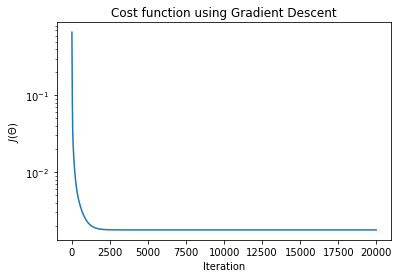

In [297]:
alpha =0.1
n_iter = 20000
N=np.size(x,1)
theta = np.random.randn(N+1,1)
#print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
#print(x_b)
print(computeCost(theta,x_b,y))

theta,cost_history,theta_history = gradient_descent(x_b,y,theta,alpha,n_iter)

print(theta)
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

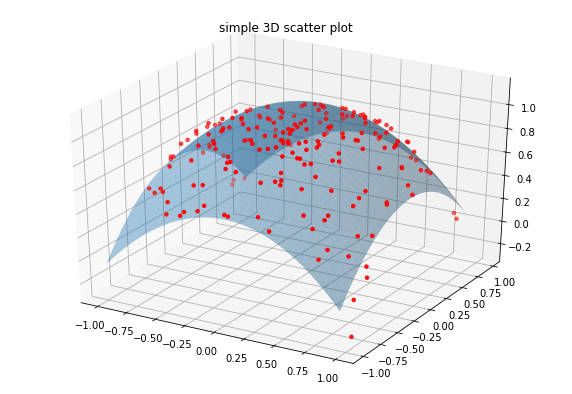

In [298]:
[XX,YY]=np.meshgrid(df[:,1],df[:,2])
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = theta[0]+theta[1]*X+theta[2]*Y+theta[3]*X**2+theta[4]*Y**2+theta[5]*X**3+theta[6]*Y**3

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                        antialiased=True, alpha=0.4)
# Creating plot
ax.scatter3D(df[:,1],df[:,2],test_func(df[:,1],df[:,2]), color = "red", s=12, label='data sample')
plt.title("simple 3D scatter plot")
# show plot
plt.show()

As can see in the final result of $\Theta$, the zero order term (bias term) has value close to 1, which is $f(0,0)$. \\
Also, only the coefficients in second order terms of $x$ and $y$ and the constant term are significant, while the others are 2 order of magnitude lower than them. That is as excepted, since $\cos(x^2+y^2)$ is even in $x$ and $y$.  Therefore any surviving term should have even orders in both $x$ and $y$.

In [299]:
df = pd.read_csv('/content/test_func_data.csv')
#print(df)

In [300]:
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x^4']=df['x']**4
df['y^4']=df['y']**4
df['x^2*y^2']=df['x']**2*df['y']**2
print(df)

       f(x,y)         x         y       x^2       y^2       x^4           y^4  \
0    0.656303  0.924592  0.004187  0.854870  0.000018  0.730803  3.072003e-10   
1    0.979727 -0.104030 -0.436900  0.010822  0.190882  0.000117  3.643591e-02   
2    0.740500  0.724694  0.460218  0.525182  0.211800  0.275816  4.485932e-02   
3    0.999979  0.041302  0.069519  0.001706  0.004833  0.000003  2.335634e-05   
4    0.998923 -0.214654 -0.018455  0.046076  0.000341  0.002123  1.159932e-07   
..        ...       ...       ...       ...       ...       ...           ...   
195  0.935713 -0.127280  0.586788  0.016200  0.344321  0.000262  1.185567e-01   
196  0.864487  0.279445 -0.669760  0.078090  0.448578  0.006098  2.012225e-01   
197  0.424728  0.930187 -0.516611  0.865248  0.266887  0.748653  7.122877e-02   
198  0.891688 -0.154644  0.667699  0.023915  0.445822  0.000572  1.987569e-01   
199  0.958142  0.257162 -0.473521  0.066132  0.224222  0.004373  5.027561e-02   

      x^2*y^2  
0    0.0000

In [301]:
df = df.to_numpy()
x = df[:,3:8]
y = [df[:,0]]
x = np.array(x)
#print(x)
y = np.array(y)
y = y.T
#print(y)

1.8334857385938705
[[ 1.01571188]
 [-0.13200685]
 [-0.1020384 ]
 [-0.34090858]
 [-0.37706669]
 [-0.65752533]]
Final cost/MSE:  0.00005


Text(0.5, 1.0, 'Cost function using Gradient Descent')

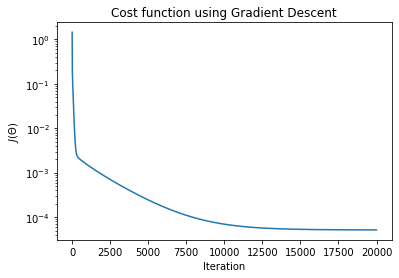

In [302]:
alpha =0.1
n_iter = 20000
N=np.size(x,1)
theta = np.random.randn(N+1,1)
#print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
#print(x_b)
print(computeCost(theta,x_b,y))

theta,cost_history,theta_history = gradient_descent(x_b,y,theta,alpha,n_iter)

print(theta)
print('Final cost/MSE:  {:0.5f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

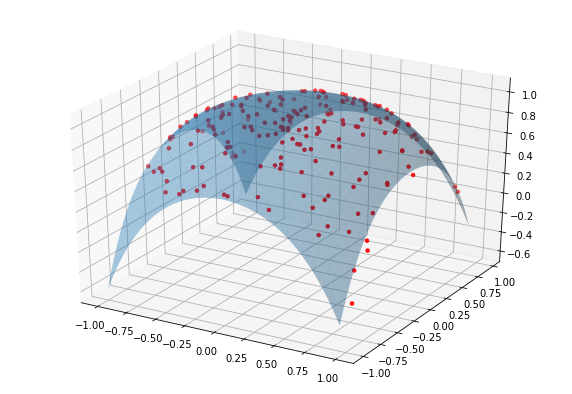

In [303]:
[XX,YY]=np.meshgrid(df[:,1],df[:,2])
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = theta[0]+theta[1]*X**2+theta[2]*Y**2+theta[3]*X**4+theta[4]*Y**4+theta[5]*X**2*Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                        antialiased=True, alpha=0.4, label='fit result')
# Creating plot
ax.scatter3D(df[:,1],df[:,2],test_func(df[:,1],df[:,2]), color = "red", s=12, label='data sample')
# show plot
plt.show()

As shown in the result, the final cost is much smaller than that of the previous case, even though we used 1 less term to fit.